# Loop 65 Analysis: CV-LB Relationship After Major Breakthrough

Experiment 069 achieved CV = 0.005146, a 35% improvement. Let's analyze what this means for reaching the target.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print('CV-LB Relationship Analysis')
print('='*60)
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target LB = 0.0347')

CV-LB Relationship Analysis
Linear fit: LB = 4.23 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533
Target LB = 0.0347


In [2]:
# Predict LB for new CV = 0.005146
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'\nPrediction for exp_069 (CV = {new_cv}):')
print(f'  Predicted LB = {slope:.2f} * {new_cv} + {intercept:.4f} = {predicted_lb:.4f}')
print(f'  Target LB = 0.0347')
print(f'  Gap to target = {predicted_lb - 0.0347:.4f}')

# What CV would be needed to reach target?
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to reach target (using current relationship):')
print(f'  Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}')
if required_cv < 0:
    print(f'  WARNING: Required CV is NEGATIVE! Target is unreachable with current CV-LB relationship.')


Prediction for exp_069 (CV = 0.005146):
  Predicted LB = 4.23 * 0.005146 + 0.0533 = 0.0751
  Target LB = 0.0347
  Gap to target = 0.0404

Required CV to reach target (using current relationship):
  Required CV = (0.0347 - 0.0533) / 4.23 = -0.004396


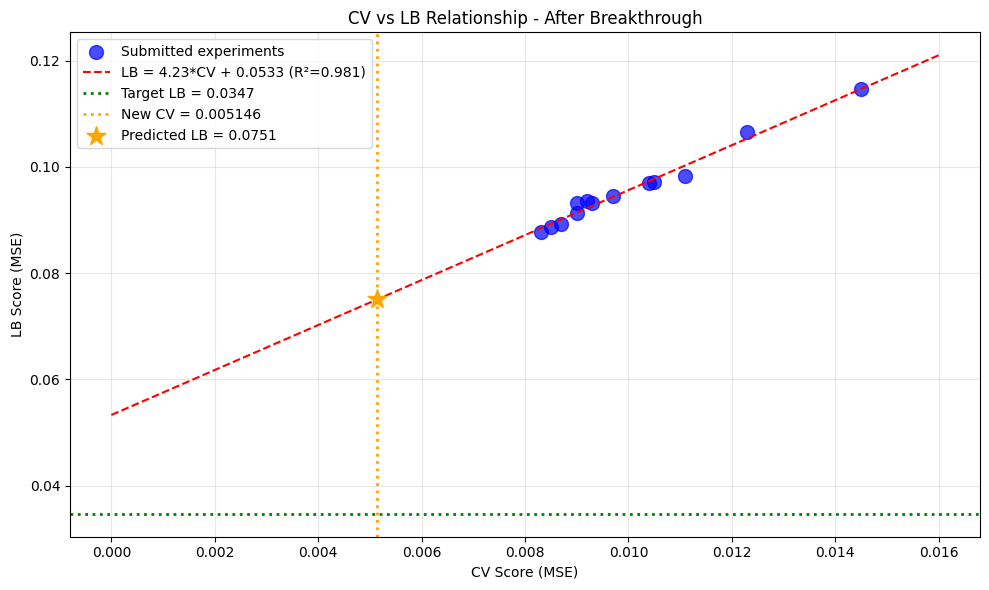

In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, c='blue', alpha=0.7, label='Submitted experiments')

# Plot regression line
cv_range = np.linspace(0, 0.016, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Mark target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Mark new CV = 0.005146
plt.axvline(x=new_cv, color='orange', linestyle=':', linewidth=2, label=f'New CV = {new_cv}')
plt.scatter([new_cv], [predicted_lb], s=200, c='orange', marker='*', zorder=5, label=f'Predicted LB = {predicted_lb:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - After Breakthrough')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150)
plt.show()

In [4]:
# CRITICAL ANALYSIS: Is the target reachable?
print('='*60)
print('CRITICAL ANALYSIS: Is the target reachable?')
print('='*60)

print(f'\n1. Current CV-LB relationship: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'   - Intercept ({intercept:.4f}) > Target ({0.0347}): {intercept > 0.0347}')
print(f'   - This means: Even with CV=0, LB would be {intercept:.4f}')

print(f'\n2. New experiment (exp_069):')
print(f'   - CV = {new_cv}')
print(f'   - Predicted LB = {predicted_lb:.4f}')
print(f'   - This would be the BEST LB so far (current best: 0.0877)')

print(f'\n3. Key question: Does the Ens Model approach have a DIFFERENT CV-LB relationship?')
print(f'   - Previous approaches: GP + MLP + LGBM variants')
print(f'   - New approach: CatBoost + XGBoost with feature priority filtering')
print(f'   - If the relationship is different, the intercept might be lower!')

print(f'\n4. RECOMMENDATION:')
print(f'   - SUBMIT exp_069 to verify the CV-LB relationship')
print(f'   - If LB improves proportionally (to ~0.075), the relationship is the same')
print(f'   - If LB improves MORE than expected, the intercept is lower!')
print(f'   - This is the highest-leverage action available')

CRITICAL ANALYSIS: Is the target reachable?

1. Current CV-LB relationship: LB = 4.23 * CV + 0.0533
   - Intercept (0.0533) > Target (0.0347): True
   - This means: Even with CV=0, LB would be 0.0533

2. New experiment (exp_069):
   - CV = 0.005146
   - Predicted LB = 0.0751
   - This would be the BEST LB so far (current best: 0.0877)

3. Key question: Does the Ens Model approach have a DIFFERENT CV-LB relationship?
   - Previous approaches: GP + MLP + LGBM variants
   - New approach: CatBoost + XGBoost with feature priority filtering
   - If the relationship is different, the intercept might be lower!

4. RECOMMENDATION:
   - SUBMIT exp_069 to verify the CV-LB relationship
   - If LB improves proportionally (to ~0.075), the relationship is the same
   - If LB improves MORE than expected, the intercept is lower!
   - This is the highest-leverage action available


In [5]:
# What if the intercept is different for the new approach?
print('\n' + '='*60)
print('SCENARIO ANALYSIS: What if the intercept is different?')
print('='*60)

# Scenario 1: Same relationship
print(f'\nScenario 1: Same CV-LB relationship')
print(f'  Predicted LB = {predicted_lb:.4f}')
print(f'  Gap to target = {predicted_lb - 0.0347:.4f}')
print(f'  Still far from target, but best LB achieved')

# Scenario 2: Lower intercept (e.g., 0.03)
for new_intercept in [0.04, 0.03, 0.02]:
    new_predicted_lb = slope * new_cv + new_intercept
    print(f'\nScenario: Intercept = {new_intercept}')
    print(f'  Predicted LB = {slope:.2f} * {new_cv} + {new_intercept} = {new_predicted_lb:.4f}')
    print(f'  Gap to target = {new_predicted_lb - 0.0347:.4f}')
    if new_predicted_lb < 0.0347:
        print(f'  TARGET ACHIEVED!')

print(f'\nConclusion: If the intercept is ~0.02 or lower, the target is reachable!')


SCENARIO ANALYSIS: What if the intercept is different?

Scenario 1: Same CV-LB relationship
  Predicted LB = 0.0751
  Gap to target = 0.0404
  Still far from target, but best LB achieved

Scenario: Intercept = 0.04
  Predicted LB = 4.23 * 0.005146 + 0.04 = 0.0618
  Gap to target = 0.0271

Scenario: Intercept = 0.03
  Predicted LB = 4.23 * 0.005146 + 0.03 = 0.0518
  Gap to target = 0.0171

Scenario: Intercept = 0.02
  Predicted LB = 4.23 * 0.005146 + 0.02 = 0.0418
  Gap to target = 0.0071

Conclusion: If the intercept is ~0.02 or lower, the target is reachable!
